# hello guys this is Aryan and here i am with another practice project
#as the last time i'd be really happy if you guys help making it better although this time i got a strangely good score from the tests 
thank you all<|>

# importing needed libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder

# reading the data

In [2]:
df = pd.read_csv(r"E:\python\csv files\fitness_tracker.csv")
df = df.drop(['User ID','Body Fat (%)','VO2 Max','Water Intake (liters)'] ,axis = 1)
df.head()

,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Mood Before Workout,Mood After Workout
0,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,3195,61,Tired,Fatigued
1,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,2541,73,Happy,Energized
2,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,3362,80,Happy,Fatigued
3,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,2071,65,Neutral,Neutral
4,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,3298,59,Stressed,Energized


In [3]:
df['Workout Type'].value_counts()

Workout Type
HIIT        1731
Strength    1667
Yoga        1666
Cycling     1656
Cardio      1645
Running     1635
Name: count, dtype: int64

# visualization

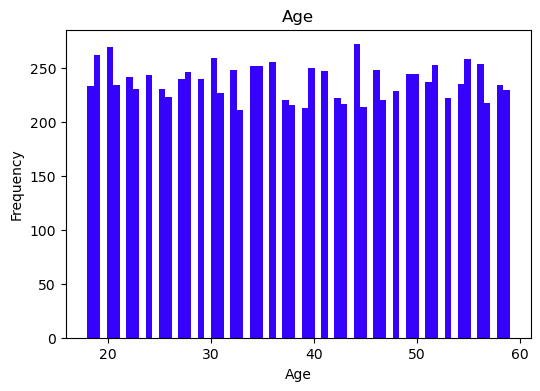

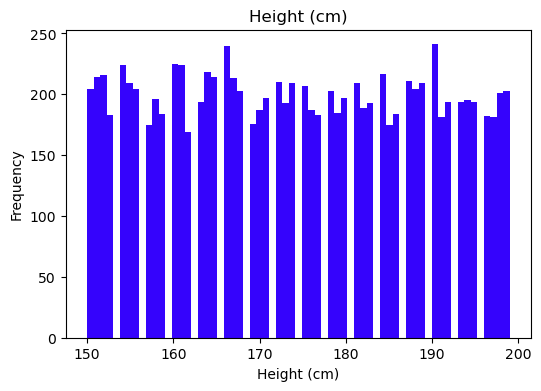

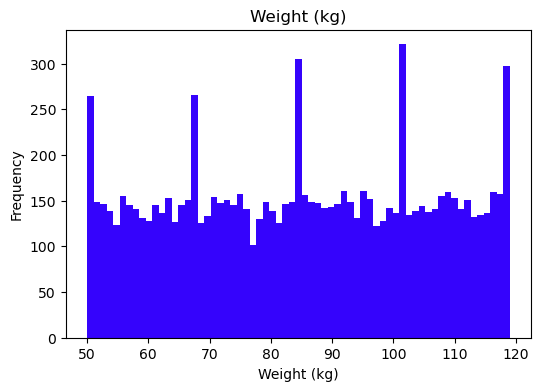

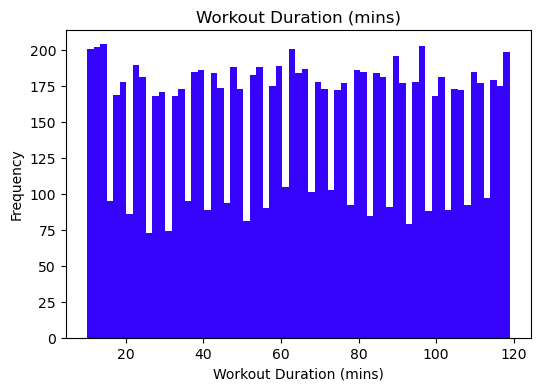

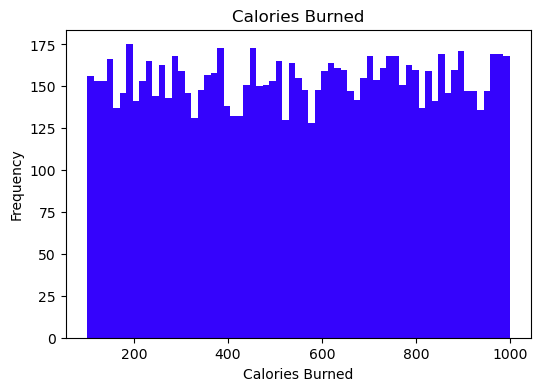

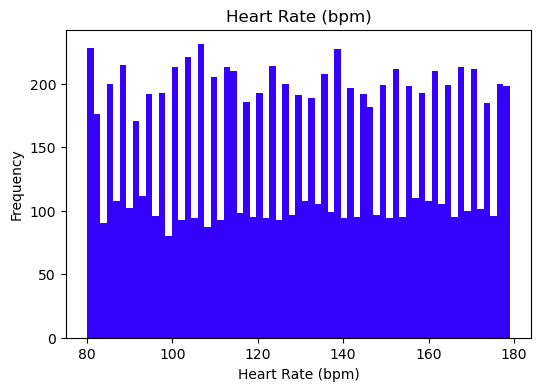

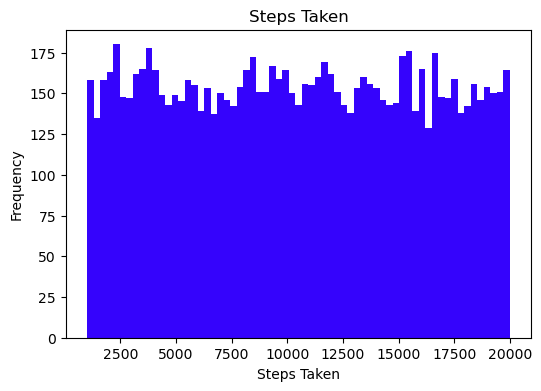

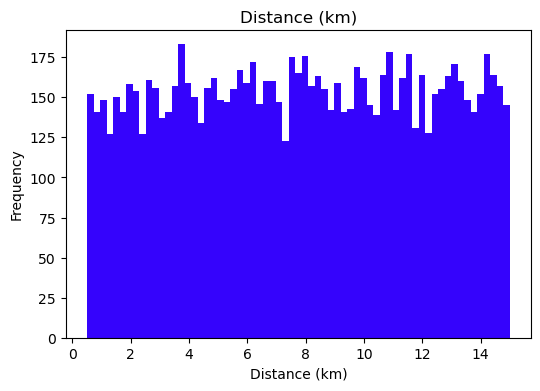

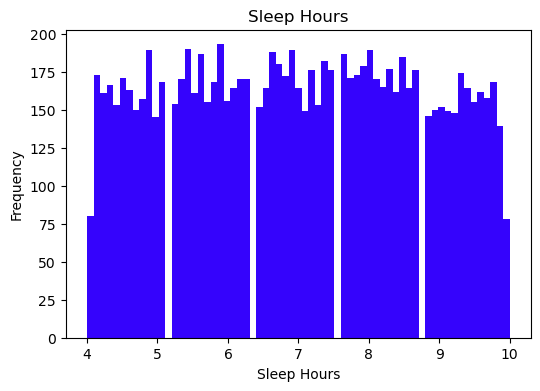

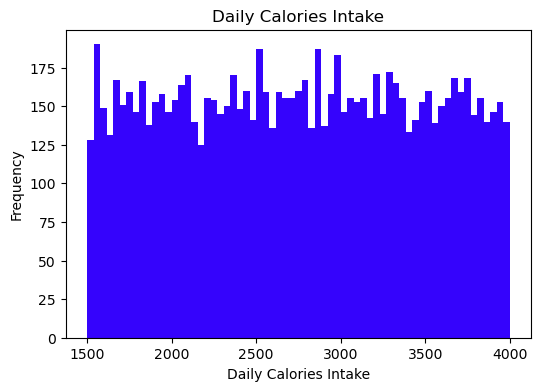

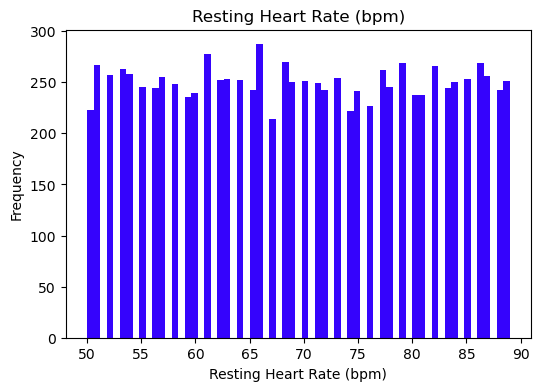

In [4]:
exclude_cols = ['User ID']
for col in df.select_dtypes(include=['number']).columns:
    if col not in exclude_cols:
        plt.figure(figsize=(6,4)) 
        df[col].hist(bins=65, color='#3503fc')  
        plt.title(col)         
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.grid(False)
        plt.show()


AGE
Mean: 38.39
Median: 38.00
Mode: 44.00


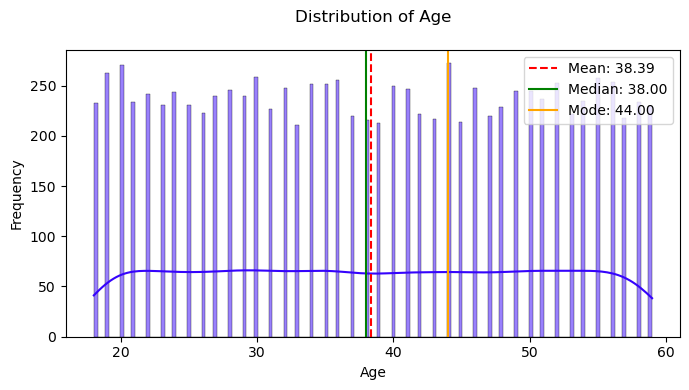


HEIGHT (CM)
Mean: 174.28
Median: 174.00
Mode: 190.00


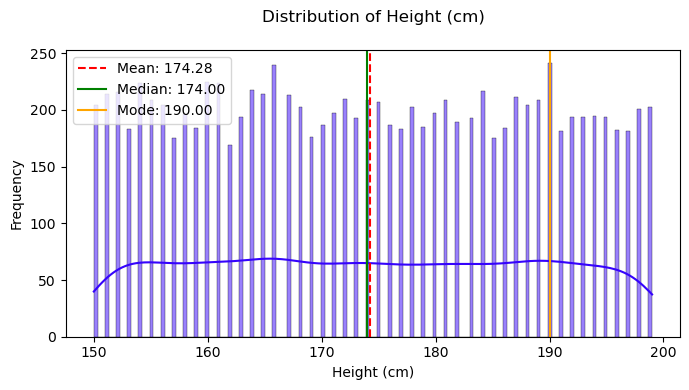


WEIGHT (KG)
Mean: 84.90
Median: 85.00
Mode: 85.00


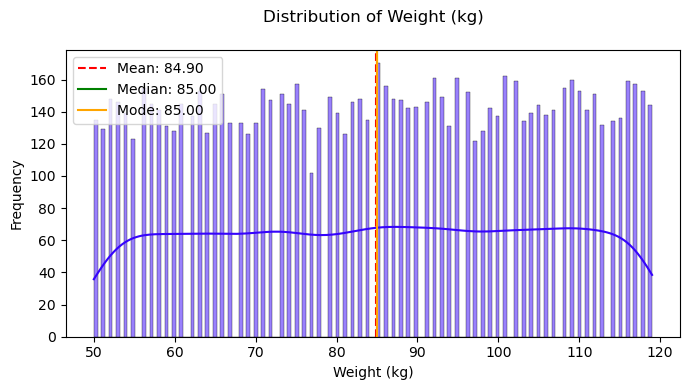


WORKOUT DURATION (MINS)
Mean: 64.46
Median: 64.00
Mode: 15.00


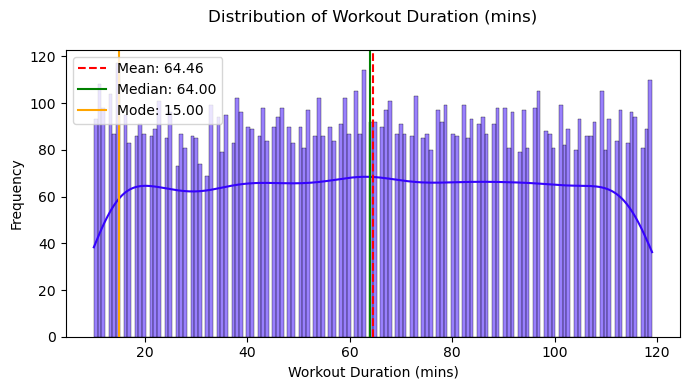


CALORIES BURNED
Mean: 552.10
Median: 554.00
Mode: 504.00


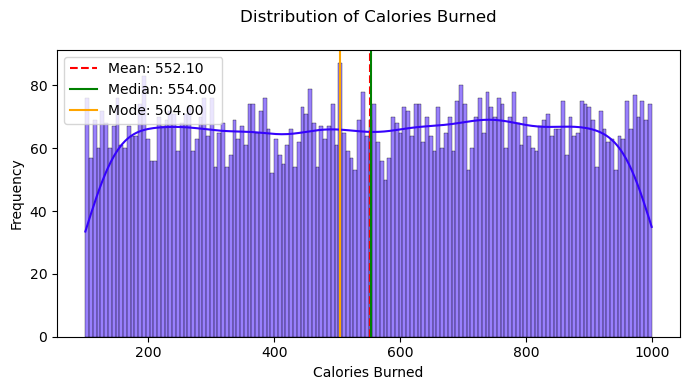


HEART RATE (BPM)
Mean: 129.53
Median: 130.00
Mode: 103.00


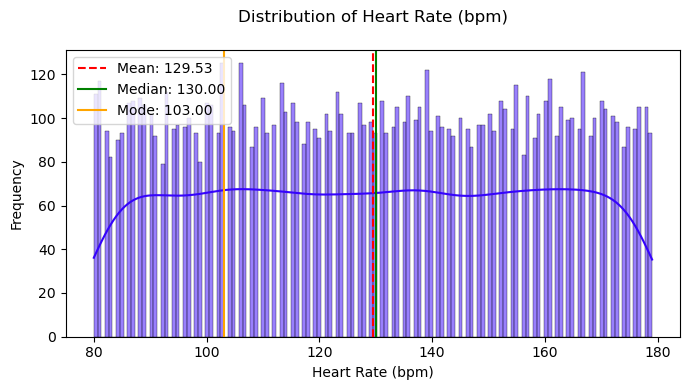


STEPS TAKEN
Mean: 10455.50
Median: 10434.50
Mode: 13990.00


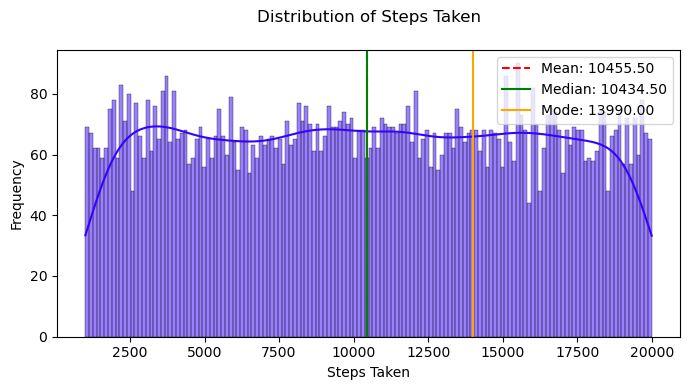


DISTANCE (KM)
Mean: 7.82
Median: 7.85
Mode: 10.81


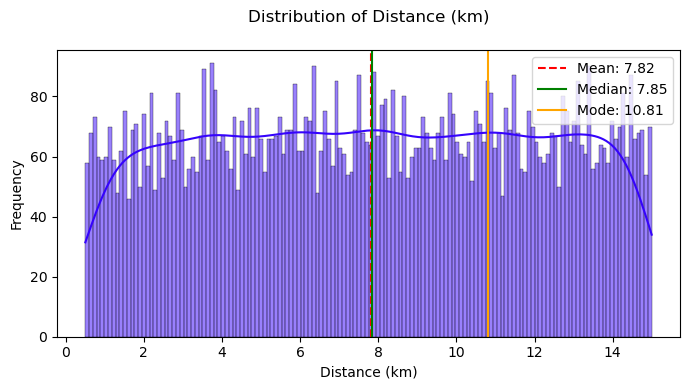


SLEEP HOURS
Mean: 6.98
Median: 7.00
Mode: 5.90


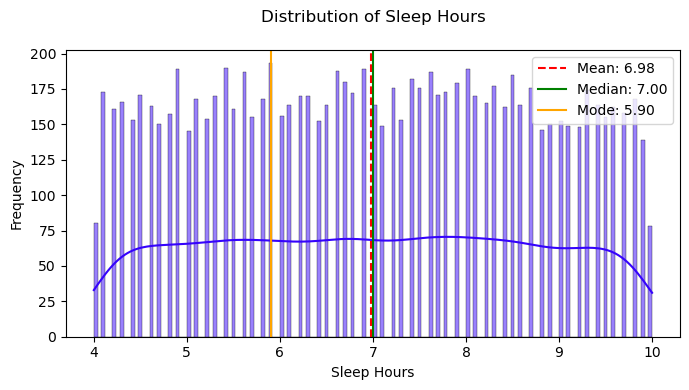


DAILY CALORIES INTAKE
Mean: 2748.43
Median: 2753.00
Mode: 2866.00


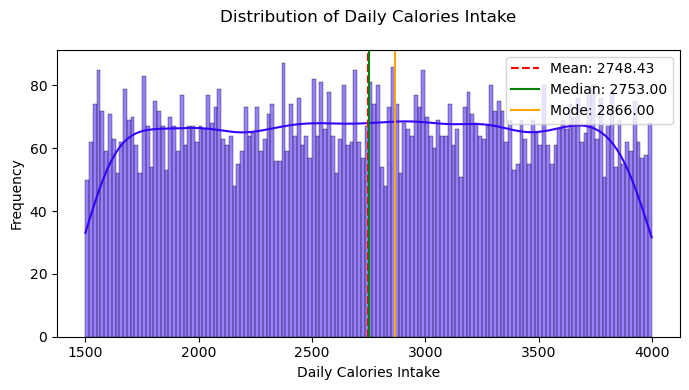


RESTING HEART RATE (BPM)
Mean: 69.49
Median: 69.00
Mode: 66.00


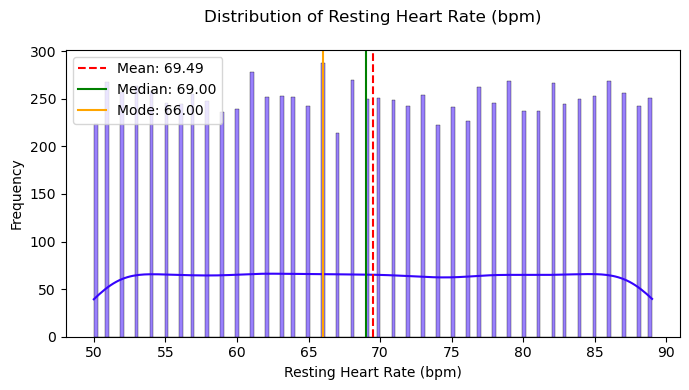

In [5]:
def analyze_numeric_columns(df, exclude_cols=[]):

    numeric_cols = [col for col in df.select_dtypes(include='number').columns 
                   if col not in exclude_cols]
    
    for column in numeric_cols:

        clean_data = df[column].dropna()
   
        stats = {
            'Mean': clean_data.mean(),
            'Median': clean_data.median(),
            'Mode': clean_data.mode()[0]  
        }
        

        print(f"\n{column.upper()}")
        for stat_name, value in stats.items():
            print(f"{stat_name}: {value:.2f}")
        
  
        create_distribution_plot(clean_data, column, stats)
        
def create_distribution_plot(data, column_name, statistics):
    """Helper function to create the distribution plot"""
    plt.figure(figsize=(7, 4))
    
  
    sns.histplot(data, bins=150, kde=True, color='#3503fc')
    

    colors = {'Mean': 'red', 'Median': 'green', 'Mode': 'orange'}
    linestyles = {'Mean': '--', 'Median': '-', 'Mode': '-'}
    
    for stat_name, value in statistics.items():
        plt.axvline(value, 
                   color=colors[stat_name], 
                   linestyle=linestyles[stat_name],
                   label=f"{stat_name}: {value:.2f}")
    

    plt.title(f'Distribution of {column_name}', pad=20)
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.legend()
    plt.grid(False)
    plt.tight_layout()
    plt.show()


analyze_numeric_columns(df, exclude_cols=exclude_cols)

# transforming into a readable format|

In [6]:
ohe_1 = OneHotEncoder(sparse_output=False)
ohed_1 = ohe_1.fit_transform(df[['Workout Type']])
ohed_1

array([[0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [7]:
ohe_2 = OneHotEncoder(sparse_output=False)
ohed_2 = ohe_2.fit_transform(df[['Gender']])
ohed_2

array([[0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [8]:
ohed_df_1 = pd.DataFrame(ohed_1,columns=ohe_1.get_feature_names_out(['Workout Type']))
ohed_df_1.head()

,Workout Type_Cardio,Workout Type_Cycling,Workout Type_HIIT,Workout Type_Running,Workout Type_Strength,Workout Type_Yoga
0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
ohed_df_2 = pd.DataFrame(ohed_2,columns=ohe_2.get_feature_names_out(['Gender']))
ohed_df_2.head()

,Gender_Female,Gender_Male,Gender_Other
0,0.0,1.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,0.0,1.0,0.0
4,0.0,0.0,1.0


In [10]:
ohed_all = pd.concat([ohed_df_1,ohed_df_2],axis=1)
workout_code = df.copy()
workout_code = df.drop(['Workout Type','Gender'], axis=1)
workout_code = pd.concat([workout_code, ohed_all], axis=1)
workout_code.head()

,Age,Height (cm),Weight (kg),Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,...,Mood After Workout,Workout Type_Cardio,Workout Type_Cycling,Workout Type_HIIT,Workout Type_Running,Workout Type_Strength,Workout Type_Yoga,Gender_Female,Gender_Male,Gender_Other
0,39,175,99,79,384,112,8850,14.44,High,8.2,...,Fatigued,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,36,157,112,73,612,168,2821,1.10,High,8.6,...,Energized,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25,180,66,27,540,133,18898,7.28,High,9.8,...,Fatigued,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,56,154,89,39,672,118,14102,6.55,Medium,5.8,...,Neutral,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,53,194,59,56,410,170,16518,3.17,Medium,7.3,...,Energized,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [12]:
LE_1 = LabelEncoder()
workout_code['Workout Intensity'] = LE_1.fit_transform(workout_code['Workout Intensity'])

In [13]:
workout_code = workout_code[
    workout_code['Mood Before Workout'] != 'Stressed']

In [14]:
M_before_map = {
    'Tired': 0,
    'Neutral': 1,
    'Happy': 2
}
M_after_map = {
    'Fatigued': 0,
    'Neutral': 1,
    'Energized': 2
}

In [15]:
workout_code = workout_code.copy()

workout_code = workout_code.assign(
    Mood_Before_Num = workout_code['Mood Before Workout'].map(M_before_map),
    Mood_After_Num = workout_code['Mood After Workout'].map(M_after_map),
    Mood_Change = lambda x: x['Mood_After_Num'] - x['Mood_Before_Num'])

In [16]:
LE_2 = LabelEncoder()
workout_code['Mood_Change'] = LE_2.fit_transform(workout_code['Mood_Change'])
workout_code['Mood_Change'].value_counts()

Mood_Change
2    2516
3    1715
1    1615
0     886
4     843
Name: count, dtype: int64

In [17]:
workout_code['Mood_Change'] = workout_code['Mood_Change'].replace({1: 0, 4: 1})

In [18]:
workout_code['Height (m)'] = workout_code['Height (cm)'] / 100 


workout_code['BMI'] = workout_code['Weight (kg)'] / (workout_code['Height (m)'] ** 2)

In [22]:
workout_code.drop(columns=['Height (m)','Height (cm)','Weight (kg)','Mood Before Workout','Mood After Workout','Mood Before Num','Mood After Num','Mood Before Workout','Mood After Workout'],inplace=True,errors = 'ignore')

In [23]:
workout_code.head()

,Age,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),...,Workout Type_Running,Workout Type_Strength,Workout Type_Yoga,Gender_Female,Gender_Male,Gender_Other,Mood_Before_Num,Mood_After_Num,Mood_Change,BMI
0,39,79,384,112,8850,14.44,0,8.2,3195,61,...,0.0,0.0,0.0,0.0,1.0,0.0,0,0,2,32.326531
1,36,73,612,168,2821,1.10,0,8.6,2541,73,...,0.0,0.0,0.0,0.0,0.0,1.0,2,2,2,45.437949
2,25,27,540,133,18898,7.28,0,9.8,3362,80,...,0.0,0.0,0.0,1.0,0.0,0.0,2,0,0,20.370370
3,56,39,672,118,14102,6.55,2,5.8,2071,65,...,0.0,0.0,0.0,0.0,1.0,0.0,1,1,2,37.527408
5,33,11,301,142,10895,6.53,1,4.2,2401,69,...,0.0,0.0,1.0,0.0,1.0,0.0,2,1,0,30.864198


# evaluation

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,make_scorer
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, StratifiedKFold
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [33]:
#lets select what we need
numeric_cols = ['Workout Duration (mins)',
       'Calories Burned', 'Heart Rate (bpm)', 'Steps Taken', 'Distance (km)',
       'Workout Intensity', 'Sleep Hours',  
       'Daily Calories Intake', 'Resting Heart Rate (bpm)', 
       'Workout Type_Cardio', 'Workout Type_Cycling', 'Workout Type_HIIT',
       'Workout Type_Running', 'Workout Type_Strength', 'Workout Type_Yoga',
       'Gender_Female', 'Gender_Male', 'Gender_Other'
]
workout_encoded_numeric = workout_code[numeric_cols]
workout_encoded_non_numeric = workout_code.drop(columns=numeric_cols)
scaler = StandardScaler()
workout_encoded_numeric_scaled = scaler.fit_transform(workout_encoded_numeric)
workout_encoded_numeric_scaled = pd.DataFrame(workout_encoded_numeric_scaled, columns=numeric_cols, index=workout_code.index)
workout_final = pd.concat([workout_encoded_numeric_scaled, workout_encoded_non_numeric], axis=1)

In [35]:
#separation(lol a movie name)
X = workout_final.drop('Mood_Change', axis=1)
y = workout_final['Mood_Change'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [27]:
models_to_evaluate = [
    ("Logistic Regression", LogisticRegression(max_iter=2500)),
    ("Decision Tree", DecisionTreeClassifier(max_depth=3)),
    ("Random Forest", RandomForestClassifier(n_estimators=16, max_depth=6, random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(n_estimators=16, learning_rate=0.1, max_depth=3, random_state=42)),
    ("Support Vector Classifier", SVC(kernel='rbf', C=0.5, probability=True, random_state=42)),
    ("K-Nearest Neighbors", KNeighborsClassifier(n_neighbors=10)),
    ("XGBoost", XGBClassifier(n_estimators=16,use_label_encoder=False, eval_metric='logloss', max_depth=3,random_state=42)),
    ("LightGBM", LGBMClassifier(n_estimators=24,max_depth=5,random_state=42))
]

results = []

for name, model in models_to_evaluate:
   
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test) 
    
    
    acc_train = accuracy_score(y_train, y_pred_train)
    acc_test = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test, average='weighted')
    recall = recall_score(y_test, y_pred_test, average='weighted')
    f1 = f1_score(y_test, y_pred_test, average='weighted')
    results.append({
    "Model": name,
    "Accuracy (Train)": acc_train * 100,
    "Accuracy (Test)": acc_test * 100,
    "Precision": precision * 100,
    "Recall": recall * 100,
    "F1-Score": f1 * 100,
    })

E:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\anaconda\Lib\site-packages\xgboost\training.py:183: UserWarning: [20:10:16] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.019377 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1669
[LightGBM] [Info] Number of data points in the train set: 6060, number of used features: 22
[LightGBM] [Info] Start training from score -1.099603
[LightGBM] [Info] Start training from score -2.203681
[LightGBM] [Info] Start training from score -1.105567
[LightGBM] [Info] Start training from score -1.489091
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

# aaaaand seeing the result finally

In [30]:
df_results = pd.DataFrame(results)
print(df_results.sort_values("Accuracy (Test)", ascending=False).to_string(index=False))

                    Model  Accuracy (Train)  Accuracy (Test)  Precision     Recall   F1-Score
      Logistic Regression        100.000000       100.000000 100.000000 100.000000 100.000000
        Gradient Boosting        100.000000       100.000000 100.000000 100.000000 100.000000
                  XGBoost        100.000000       100.000000 100.000000 100.000000 100.000000
                 LightGBM        100.000000       100.000000 100.000000 100.000000 100.000000
            Random Forest         98.448845        98.085809  98.119841  98.085809  98.084822
            Decision Tree         78.663366        78.085809  81.691666  78.085809  77.958152
Support Vector Classifier         56.650165        55.973597  44.016588  55.973597  46.501840
      K-Nearest Neighbors         55.874587        43.762376  41.964472  43.762376  41.236160


# ok let's do it in another way now let's see how much calory we'll burn

In [36]:
df.head()

,Age,Gender,Height (cm),Weight (kg),Workout Type,Workout Duration (mins),Calories Burned,Heart Rate (bpm),Steps Taken,Distance (km),Workout Intensity,Sleep Hours,Daily Calories Intake,Resting Heart Rate (bpm),Mood Before Workout,Mood After Workout
0,39,Male,175,99,Cycling,79,384,112,8850,14.44,High,8.2,3195,61,Tired,Fatigued
1,36,Other,157,112,Cardio,73,612,168,2821,1.10,High,8.6,2541,73,Happy,Energized
2,25,Female,180,66,HIIT,27,540,133,18898,7.28,High,9.8,3362,80,Happy,Fatigued
3,56,Male,154,89,Cycling,39,672,118,14102,6.55,Medium,5.8,2071,65,Neutral,Neutral
4,53,Other,194,59,Strength,56,410,170,16518,3.17,Medium,7.3,3298,59,Stressed,Energized
